In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/README.md
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/6345.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/9812.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/2339.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5404.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5150.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/1624.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/3188.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/7964.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learni

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### load the data

In [4]:
product = pd.read_csv('/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv')
districts = pd.read_csv('/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv')

In [5]:
product.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [6]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [7]:
product.isnull().sum()

LP ID                          0
URL                            0
Product Name                   0
Provider/Company Name          1
Sector(s)                     20
Primary Essential Function    20
dtype: int64

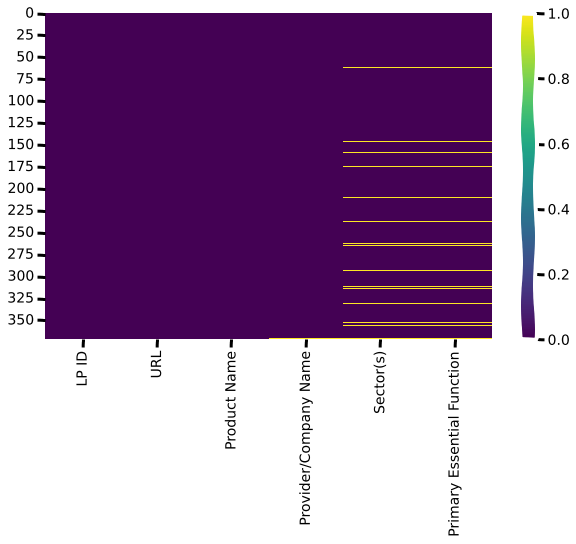

In [8]:
with plt.xkcd():
    sns.heatmap(product.isnull(), cmap='viridis')
    fig = plt.gcf()
    fig.set_size_inches(10,6)

In [9]:
districts.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [11]:
districts.isnull().sum()

district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

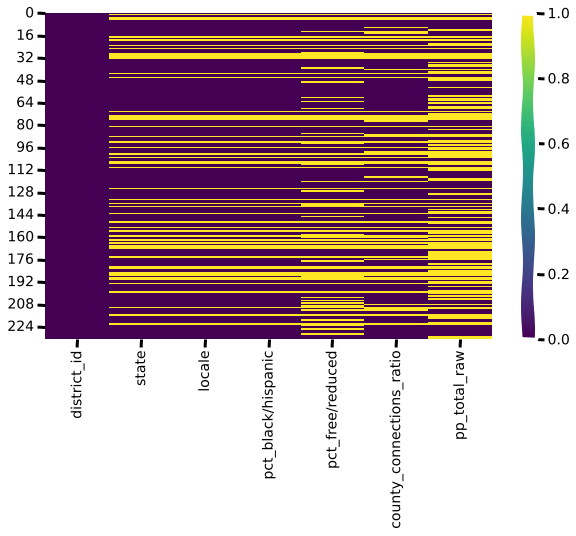

In [12]:
with plt.xkcd():
    sns.heatmap(districts.isnull(), cmap='viridis')
    fig = plt.gcf()
    fig.set_size_inches(10,6)

### data EDA

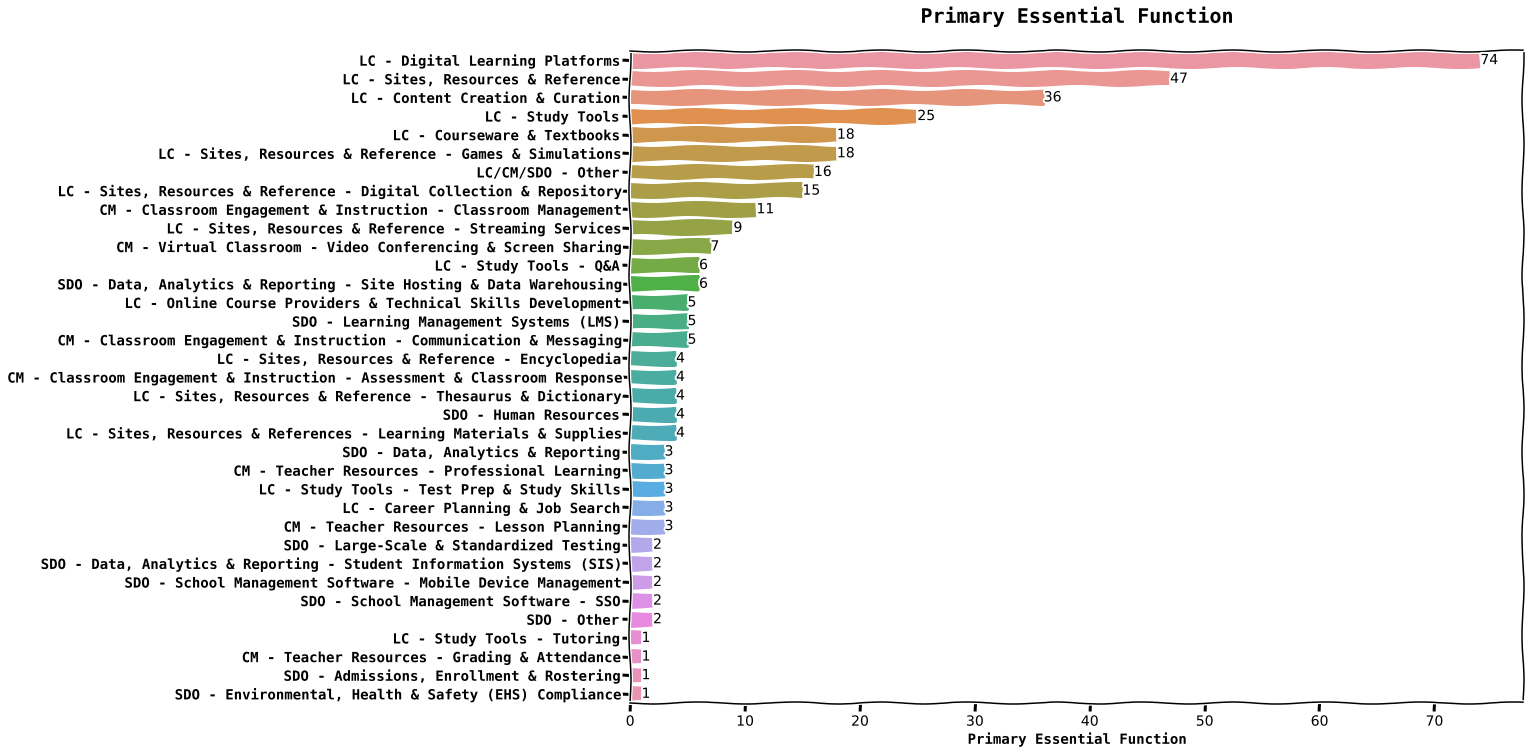

In [13]:
with plt.xkcd():
    sns.barplot(data=product['Primary Essential Function'].value_counts().reset_index(), y='index', x='Primary Essential Function')
    fig = plt.gcf()
    fig.set_size_inches(16,12)
    plt.ylabel('')
    ax = plt.gca()
    for i in ax.containers:
        plt.bar_label(i)
    plt.title('Primary Essential Function\n', font='monospace',weight='semibold',size=20)
    for j in ax.get_yticklabels():
        j.set_font('monospace')
        j.set_weight('semibold')
    plt.xlabel('Primary Essential Function', font='monospace',weight='semibold');

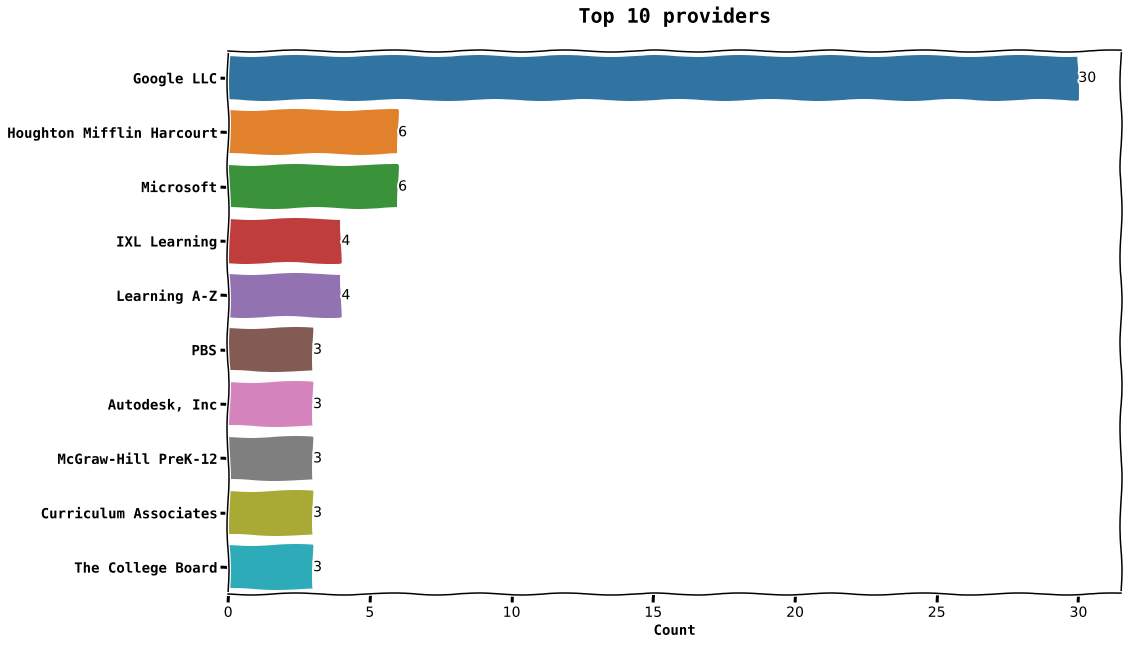

In [14]:
with plt.xkcd():
    sns.barplot(data=product['Provider/Company Name'].value_counts().reset_index()[:10], y='index', x='Provider/Company Name')
    fig = plt.gcf()
    fig.set_size_inches(16,10)
    plt.ylabel('')
    ax = plt.gca()
    for i in ax.containers:
        plt.bar_label(i)
    for j in ax.get_yticklabels():
        j.set_font('monospace')
        j.set_weight('semibold')
    plt.xlabel('Count', font='monospace',weight='semibold')
    plt.title('Top 10 providers\n', font='monospace',weight='semibold',size=20)

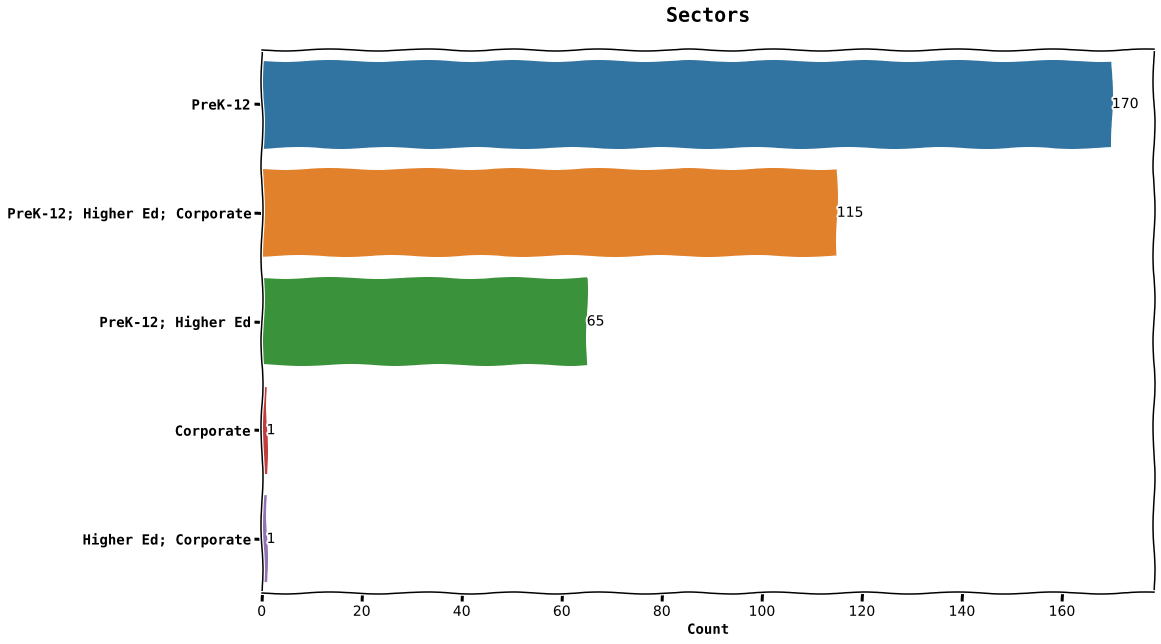

In [15]:
with plt.xkcd():
    sns.barplot(data=product['Sector(s)'].value_counts().reset_index(), y='index', x='Sector(s)')
    plt.ylabel('')
    fig = plt.gcf()
    fig.set_size_inches(16,10)
    plt.ylabel('')
    ax = plt.gca()
    for i in ax.containers:
        plt.bar_label(i)
    for j in ax.get_yticklabels():
        j.set_font('monospace')
        j.set_weight('semibold')
    plt.xlabel('Count', font='monospace',weight='semibold')
    plt.title('Sectors\n', font='monospace',weight='semibold',size=20);

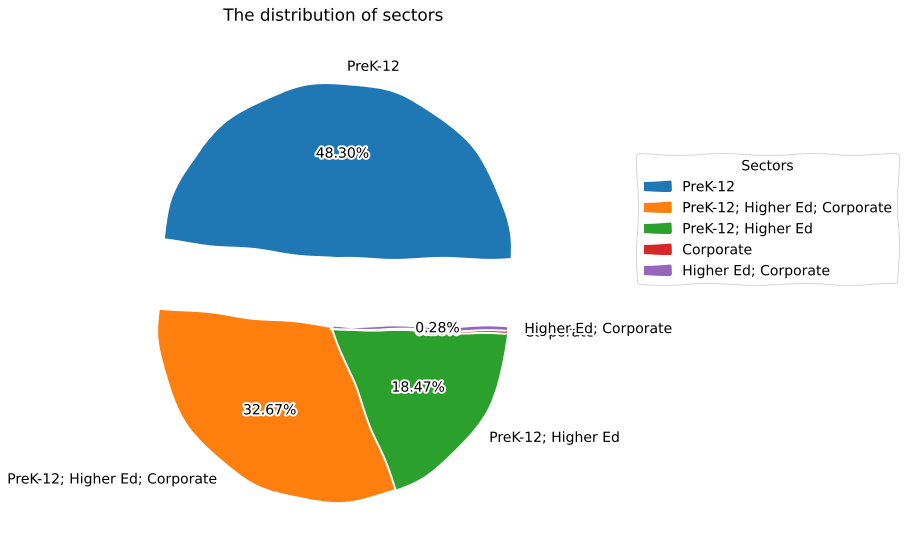

In [92]:
with plt.xkcd():
    plt.pie(product['Sector(s)'].value_counts().reset_index()['Sector(s)'], labels=product['Sector(s)'].value_counts().reset_index()['index'], autopct='%1.2f%%',
           explode=[0.4, 0,0,0,0])
    plt.legend(loc=[1.2,0.6], title='Sectors')
    fig = plt.gcf()
    fig.set_size_inches(12,8)
    plt.title('The distribution of sectors\n\n\n\n')

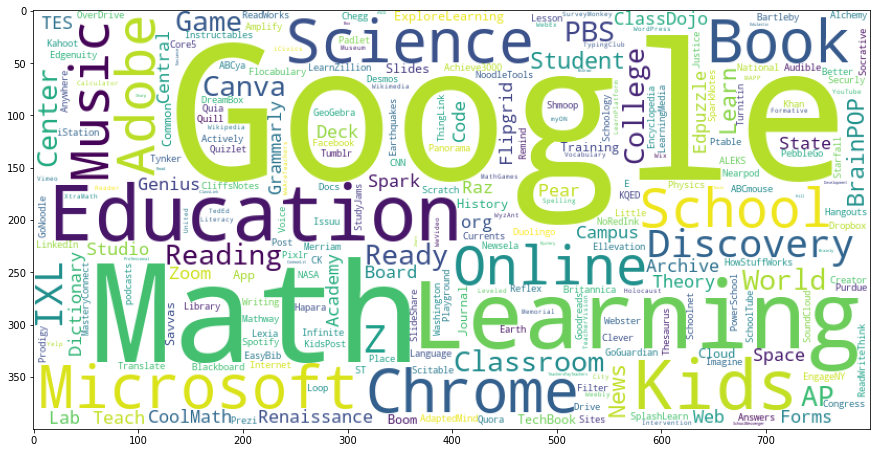

In [56]:
cloud = WordCloud(background_color='white', height=400, width=800,max_words=250 ).generate(' '.join(product['Product Name']))
plt.imshow(cloud)
fig = plt.gcf()
fig.set_size_inches(15,8)

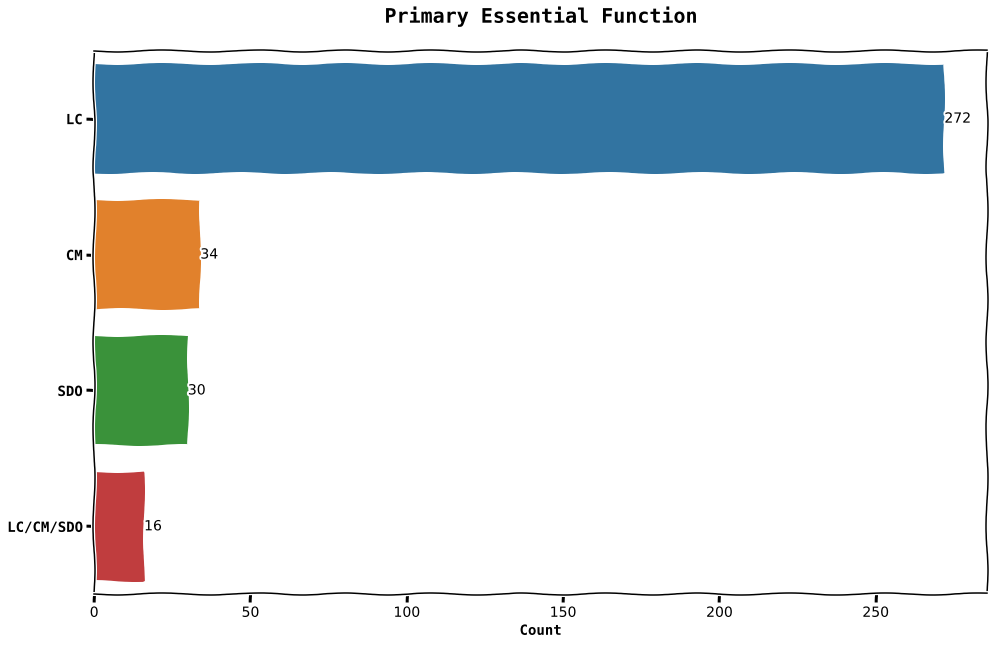

In [79]:
with plt.xkcd():
    sns.barplot(data=product[~product['Primary Essential Function'].isnull()]['Primary Essential Function'].apply(lambda x: str(x).split()[0]).value_counts().reset_index(), x='Primary Essential Function', y='index')
    plt.ylabel('')
    fig = plt.gcf()
    fig.set_size_inches(16,10)
    plt.ylabel('')
    ax = plt.gca()
    for i in ax.containers:
        plt.bar_label(i)
    for j in ax.get_yticklabels():
        j.set_font('monospace')
        j.set_weight('semibold')
    plt.xlabel('Count', font='monospace',weight='semibold')
    plt.title('Primary Essential Function\n', font='monospace',weight='semibold',size=20);

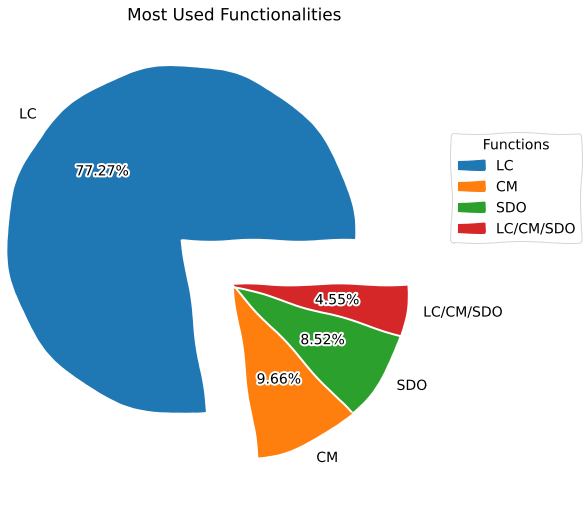

In [96]:
with plt.xkcd():
    plt.pie(product[~product['Primary Essential Function'].isnull()]['Primary Essential Function'].apply(lambda x: str(x).split()[0]).value_counts().reset_index()['Primary Essential Function'],
            labels = product[~product['Primary Essential Function'].isnull()]['Primary Essential Function'].apply(lambda x: str(x).split()[0]).value_counts().reset_index()['index'],
            autopct='%1.2f%%',
           explode=[0.4,0,0,0])
    plt.legend(loc=[1,0.6], title = 'Functions')
    fig = plt.gcf()
    fig.set_size_inches(12,8)
    plt.title('Most Used Functionalities\n\n')